In [1]:
from collections import Counter
import matplotlib.pyplot as plt

with open(
        r'C:\Users\AjithSreenivasan\OneDrive - Robinson Bowmaker Paul\Coursera\Discrete Optimization\graph_coloring_2\Graph coloring\coloring\data\gc_20_5',
        'r') as input_data_file:
    input_data = input_data_file.read()
data_list = input_data.split()
data_list = list(map(int, data_list))
n_nodes = data_list[0]
n_edges = data_list[1]
edge_data = data_list[2:]
edge_list = [edge_data[i:i + 2] for i in range(0, int(len(edge_data)), 2)]
node_list = [i for i in range(0, n_nodes)]

# number of edges from node
count_edges = sorted(Counter(edge_data).items())

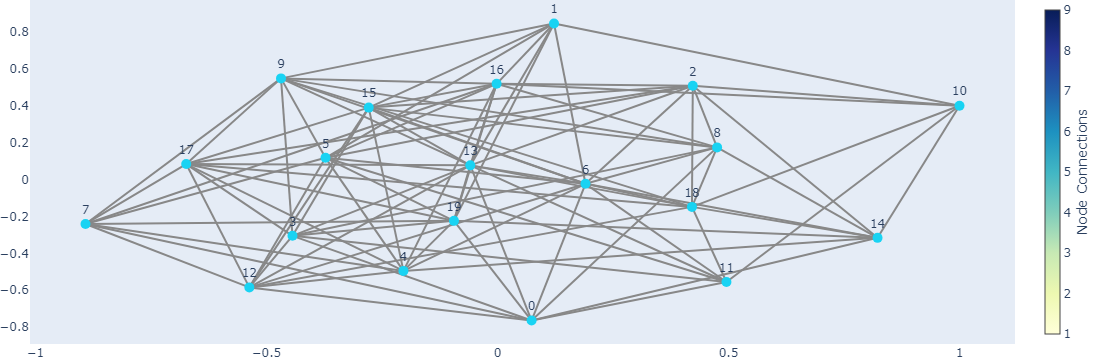

In [2]:
import plotly.graph_objs as go
import networkx as nx
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

# List of edges (this can change)
edges = edge_list

# Create a graph using NetworkX
G = nx.Graph()
G.add_edges_from(edges)

# Use NetworkX to automatically determine positions of nodes
pos = nx.spring_layout(G)

# Extract the nodes and edges for Plotly
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=2, color='#888'),
        hoverinfo='none',
        mode='lines'
    ))

node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    text=[str(node) for node in G.nodes()],
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
    )
)

layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
)

fig = go.Figure(data=edge_trace + [node_trace], layout=layout)
iplot(fig)
